# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3 #database
import matplotlib.pyplot as plt #data vizualization library
import statistics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flights/flights.csv


Let's read the dataset from the .csv file using Pandas.

In [2]:
flight = pd.read_csv('/kaggle/input/flights/flights.csv')

# Dataset Info

In [3]:
pd.set_option('display.max_columns', None)

Let's explore some elements of the dataset we have.

In [4]:
flight.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


Now let's get the size and data types of our dataset.

In [5]:
flight.shape

(336776, 21)

In [6]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

# Pre Processing

In [7]:
data = flight.copy()

Now, let's add date column based on column year, month and day


In [8]:
data.insert(loc = 1,
            column = 'date',
            value = pd.to_datetime(data[['year','month','day']])
           )
data = data.rename(columns={"name": "carrier_name"})

Now, when we have combined date column in our table, we can drop redundant year, month and day columns.

In [9]:
data = data.drop(columns = ['year','month','day'])

In [10]:
data.head(1)

,id,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,carrier_name
0,0,2013-01-01,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.


Let's figure out how many null values we have in departure_time and arrival_time columns.

In [11]:
print(data['dep_time'].isnull().sum())
print(data['arr_time'].isnull().sum())

8255
8713


If we have no arrival and departure time but have other information about the flight, we can define it as cancelled.

In [12]:
data["cancelled"] = np.where(data["dep_time"].isnull() & data["arr_time"].isnull(), 1, 0)

Now, let's create our database, establish a connection with it, and create table 'flights' using the Pandas library. This database will be our primary data source for querying data.

In [13]:
conn = sqlite3.connect('mydatabase.db')
data.to_sql('flights', conn, if_exists='replace', index=False)
# conn.commit()

336776

Now let's explore some records from our table to make sure everything worked.

In [14]:
table = pd.read_sql("""SELECT * FROM flights LIMIT 20;""", conn)
table

,id,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,carrier_name,cancelled
0,0,2013-01-01 00:00:00,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,0
1,1,2013-01-01 00:00:00,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.,0
2,2,2013-01-01 00:00:00,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.,0
3,3,2013-01-01 00:00:00,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways,0
4,4,2013-01-01 00:00:00,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.,0
5,5,2013-01-01 00:00:00,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00,United Air Lines Inc.,0
6,6,2013-01-01 00:00:00,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00,JetBlue Airways,0
7,7,2013-01-01 00:00:00,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00,ExpressJet Airlines Inc.,0
8,8,2013-01-01 00:00:00,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00,JetBlue Airways,0
9,9,2013-01-01 00:00:00,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00,American Airlines Inc.,0


# Carrier analysis

The first activity we're going to dive into is carriers. Firstly, let's figure out what carriers there are and how many flights per year they have.

In [15]:
carrier_flights = pd.read_sql ("""
SELECT carrier, 
COUNT(*) AS carrier_flights
FROM flights
GROUP BY carrier
""", conn)
carrier_flights

,carrier,carrier_flights
0,9E,18460
1,AA,32729
2,AS,714
3,B6,54635
4,DL,48110
5,EV,54173
6,F9,685
7,FL,3260
8,HA,342
9,MQ,26397


Secondly, let's figure out how many flights from each carrier were cancelled.

In [16]:
cancelled_by_carrier = pd.read_sql("""
SELECT carrier,
SUM(cancelled) AS total_cancelled
FROM flights
GROUP BY carrier
ORDER BY total_cancelled DESC""", conn)
cancelled_by_carrier

,carrier,total_cancelled
0,EV,2817
1,MQ,1234
2,9E,1044
3,UA,686
4,US,663
5,AA,636
6,B6,466
7,DL,349
8,WN,192
9,FL,73


Next, let's explore which carriers have the highest cancelled flight percentage.

In [17]:
percentage_cancelled_by_carrier = pd.read_sql("""
SELECT carrier, 
ROUND((CAST(SUM(cancelled) AS REAL) / COUNT(*)) * 100.0, 2) AS percentage_cancelled
FROM flights
GROUP BY carrier
ORDER BY percentage_cancelled DESC
""", conn)
percentage_cancelled_by_carrier.to_sql('carrier_percentage_cancelled', conn, if_exists='replace', index=False)
percentage_cancelled_by_carrier

,carrier,percentage_cancelled
0,OO,9.38
1,YV,9.32
2,9E,5.66
3,EV,5.20
4,MQ,4.67
5,US,3.23
6,FL,2.24
7,AA,1.94
8,WN,1.56
9,UA,1.17


Before analyzing flights delays, let's make a histogram of our departure and arrival delay to see which distribution they have.

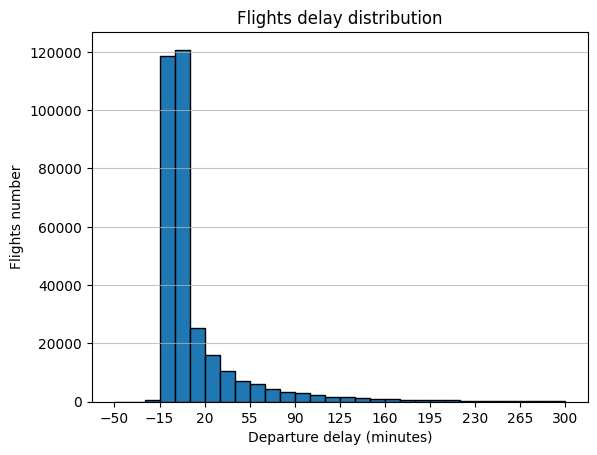

In [18]:
dep_delay_distribution = pd.read_sql("""
SELECT dep_delay
FROM flights
WHERE cancelled = 0
""", conn)

plt.hist(dep_delay_distribution['dep_delay'], bins=30, edgecolor='k', range=(-50, 300))
plt.title('Flights delay distribution')
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Flights number')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(-50, 301, 35))

plt.show()

We can see that the distribution is extremely right-skewed and most of the delays are between -15 and 20 minutes from the schedule.

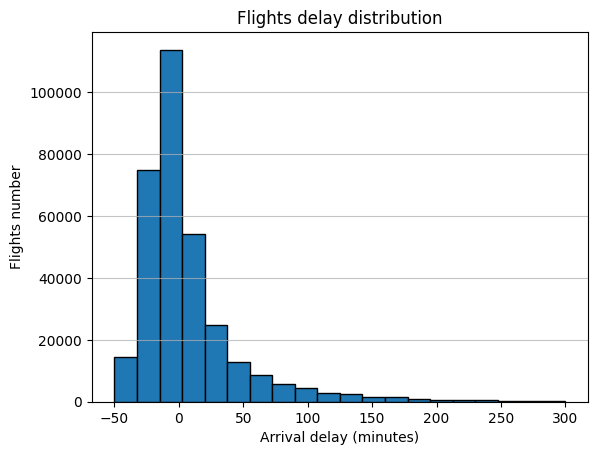

In [19]:
arr_delay_distribution = pd.read_sql("""
SELECT arr_delay
FROM flights
WHERE cancelled = 0
""", conn)

plt.hist(arr_delay_distribution['arr_delay'], bins=20, edgecolor='k', range = (-50, 300))
plt.title('Flights delay distribution')
plt.xlabel('Arrival delay (minutes)')
plt.ylabel('Flights number')
plt.grid(axis='y', alpha=0.75)
plt.show()

We can see that arrival delay distribution is right-skewed too.
Because our data is not symmetrically distributed, mean values are not a good measure of central tendency, because it's very sensitive to outliers. So instead, we should better use the median while analyzing delays.

Then, let's figure out which carrier has the highest median departure delay time.

In [20]:
median_delay_by_carrier = pd.read_sql ("""
WITH ranked_flights AS (
SELECT carrier, 
dep_delay,
NTILE(4) OVER(PARTITION BY carrier ORDER BY dep_delay) AS Quartile
FROM flights
WHERE carrier IS NOT NULL
)

SELECT carrier, 
MAX(dep_delay) AS median_delay
FROM ranked_flights
WHERE Quartile = 2
GROUP BY carrier
ORDER BY median_delay DESC
""", conn)
median_delay_by_carrier.to_sql('carrier_median_delay', conn, if_exists='replace', index=False)
median_delay_by_carrier

,carrier,median_delay
0,WN,1.0
1,FL,1.0
2,VX,0.0
3,UA,0.0
4,F9,0.0
5,B6,-1.0
6,EV,-2.0
7,DL,-2.0
8,9E,-2.0
9,YV,-3.0


Finally, let's create a ranking of American airlines by such parameters: 
1. Which has the lowest percentage of flights cancelled.
2. Which one has the fewest median delay time 

To do this we'll join tables we got earlier with our primary table, and then use SQL window function RANK() to get the names of American airlines combined with their ranking. We'll save the result into the table 'carrier_rank'.

In [21]:
carrier_rank = pd.read_sql ("""
SELECT f.carrier_name, 
RANK () OVER (
ORDER BY md.median_delay, 
pc.percentage_cancelled
) AS carrier_rank, 
md.median_delay AS median_delay, 
pc.percentage_cancelled AS percentage_cancelled
FROM flights f
JOIN carrier_median_delay md
ON f.carrier = md.carrier
JOIN carrier_percentage_cancelled pc
ON f.carrier = pc.carrier
GROUP BY f.carrier
""", conn)
carrier_rank.to_sql('carrier_rank', conn, if_exists='replace', index=False)
carrier_rank


,carrier_name,carrier_rank,median_delay,percentage_cancelled
0,SkyWest Airlines Inc.,1,-6.0,9.38
1,US Airways Inc.,2,-5.0,3.23
2,Hawaiian Airlines Inc.,3,-4.0,0.00
3,Envoy Air,4,-4.0,4.67
4,Alaska Airlines Inc.,5,-3.0,0.28
5,American Airlines Inc.,6,-3.0,1.94
6,Mesa Airlines Inc.,7,-3.0,9.32
7,Delta Air Lines Inc.,8,-2.0,0.73
8,ExpressJet Airlines Inc.,9,-2.0,5.20
9,Endeavor Air Inc.,10,-2.0,5.66


# Flights analysis

Now, let's analyze the flight flow to gain some insights.
Firstly, let's get 20 of the most popular flights to see which of them have the highest demand.

In [22]:
flights_count = pd.read_sql ("""
SELECT flight, 
origin, dest AS destination, 
COUNT(*) AS total_flights
FROM flights
GROUP BY flight
ORDER BY total_flights DESC
LIMIT 20
""", conn)
flights_count

,flight,origin,destination,total_flights
0,15,EWR,HNL,968
1,27,JFK,PHX,898
2,181,JFK,SAN,882
3,301,LGA,ORD,871
4,161,JFK,MIA,786
5,695,JFK,AUS,782
6,1109,JFK,RDU,716
7,745,LGA,DFW,711
8,359,LGA,ORD,709
9,1,JFK,LAX,701


Let's see which flights have the highest cancelled percentage to optimize their number. For this calculation, we'll take only ones which have at least 10 flights per year.

In [23]:
flights_percentage_cancelled = pd.read_sql ("""
SELECT flight, 
ROUND((CAST(SUM(cancelled) AS REAL) / COUNT(*)) * 100.0, 2) AS percentage_cancelled
FROM flights
GROUP BY flight
HAVING COUNT(*) >= 10
ORDER BY percentage_cancelled DESC
LIMIT 20
""", conn)
flights_percentage_cancelled

,flight,percentage_cancelled
0,5977,38.89
1,4969,33.93
2,3398,27.27
3,3380,27.27
4,123,27.27
5,5245,25.00
6,5254,23.88
7,3476,23.81
8,4554,23.08
9,3397,22.73


Some of this flights have more than 25% cancellation rate. These cases should be investigated deeper.
Now let's find out which airports are used as an origin point.

In [24]:
origin_count = pd.read_sql("""
SELECT origin, 
COUNT(*) AS flights_count
FROM flights
GROUP BY origin
ORDER BY flights_count DESC
""", conn)
origin_count

,origin,flights_count
0,EWR,120835
1,JFK,111279
2,LGA,104662


Similarly, let's find out which airports are used as a destination point

In [25]:
destination_count = pd.read_sql("""
SELECT dest AS destination, 
COUNT(*) AS flights_count
FROM flights
GROUP BY destination
ORDER BY flights_count DESC
""", conn)
destination_count

,destination,flights_count
0,ORD,17283
1,ATL,17215
2,LAX,16174
3,BOS,15508
4,MCO,14082
...,...,...
100,HDN,15
101,SBN,10
102,ANC,8
103,LGA,1


Finally, let's figure out which airports have the highest traffic flow according to our dataset.

In [26]:
airports = pd.read_sql("""
WITH airports_list AS (
SELECT origin AS airport 
FROM flights
UNION ALL
SELECT dest 
FROM flights
)
SELECT airport, 
COUNT(*) AS flights_count
FROM airports_list
GROUP BY airport
ORDER BY flights_count DESC
""", conn)
airports

,airport,flights_count
0,EWR,120835
1,JFK,111279
2,LGA,104663
3,ORD,17283
4,ATL,17215
...,...,...
102,MTJ,15
103,HDN,15
104,SBN,10
105,ANC,8


We can see that EWR, JFK and LGA airports are significantly(~10x) more loaded than any other. It can be explained because these 3 airports are the only ones in origin column.

# Time patterns and delays analysis

The next part is dedicated to time patterns and delays analysis.

As we figured out earlier, delay data has right-skewed distribution, so we decided to use median as a central tendency measure. 

Now, let's find out overall median departure and arrival delays.

In [27]:
median_delays = pd.read_sql ("""
WITH ranked_dep_delays AS (
    SELECT
        dep_delay,
        ROW_NUMBER() OVER (ORDER BY dep_delay) AS row_num,
        COUNT(*) OVER () AS total_rows
    FROM flights
    WHERE cancelled = 0
)
,ranked_arr_delays AS (
    SELECT
        arr_delay,
        ROW_NUMBER() OVER (ORDER BY arr_delay) AS row_num,
        COUNT(*) OVER () AS total_rows
    FROM flights
    WHERE cancelled = 0
)

SELECT
    AVG(ranked_dep_delays.dep_delay) AS dep_delay_median,
    AVG(ranked_arr_delays.arr_delay) AS arr_delay_median
    
FROM ranked_dep_delays, ranked_arr_delays
WHERE ranked_dep_delays.row_num BETWEEN ranked_dep_delays.total_rows / 2 AND (ranked_dep_delays.total_rows + 1) / 2
AND ranked_arr_delays.row_num BETWEEN ranked_arr_delays.total_rows / 2 AND (ranked_arr_delays.total_rows + 1) / 2

""", conn)
median_delays

,dep_delay_median,arr_delay_median
0,-2.0,-5.0


Let's find out how many flights have median delay at least 10 minutes. For this calculation, we'll take only ones which have at least 10 flights per year.

In [28]:
median_delay_by_flight = pd.read_sql("""
WITH ranked_flights AS (
    SELECT flight, 
    dep_delay,
    arr_delay,
    COUNT(*) OVER (PARTITION BY flight) AS total_count,
    NTILE(4) OVER(PARTITION BY flight ORDER BY dep_delay) AS dep_Quartile,
    NTILE(4) OVER(PARTITION BY flight ORDER BY arr_delay) AS arr_Quartile
    FROM flights
)

SELECT flight,
MAX(dep_delay) AS dep_delay_median,
MAX(arr_delay) AS arr_delay_median
FROM ranked_flights
WHERE dep_Quartile = 2 AND arr_Quartile = 2
GROUP BY flight
HAVING total_count >= 10 AND (dep_delay_median >= 10 OR arr_delay_median >= 10)
ORDER BY arr_delay_median DESC;
""", conn)
median_delay_by_flight


,flight,dep_delay_median,arr_delay_median
0,5314,52.0,46.0
1,3472,30.0,46.0
2,5846,34.0,35.0
3,2603,53.0,34.0
4,5509,12.0,31.0
...,...,...,...
152,1561,15.0,-8.0
153,3476,16.0,-9.0
154,5391,12.0,-11.0
155,2590,11.0,-11.0


As we can see, there are 157 flights, where at least 50% of flight records had departure delay 10 or more minutes.

Let's explore if hour of day correlates with departure delays of flights.

In [29]:
delay_by_hour = pd.read_sql (                    
"""
WITH ranked_flights AS (
SELECT strftime('%H', time_hour) AS hour_of_day,
dep_delay,
NTILE(4) OVER(PARTITION BY strftime('%H', time_hour) ORDER BY dep_delay) AS Quartile
FROM flights
WHERE dep_delay IS NOT NULL
)

SELECT hour_of_day,
MAX(dep_delay) AS median_delay
FROM ranked_flights
WHERE Quartile = 2
GROUP BY hour_of_day
ORDER BY hour_of_day;
""", conn)
delay_by_hour

,hour_of_day,median_delay
0,05,-3.0
1,06,-3.0
2,07,-3.0
3,08,-3.0
4,09,-3.0
5,10,-3.0
6,11,-3.0
7,12,-2.0
8,13,-1.0
9,14,-1.0


Let's vizualize this data to see median delay by hour of day.

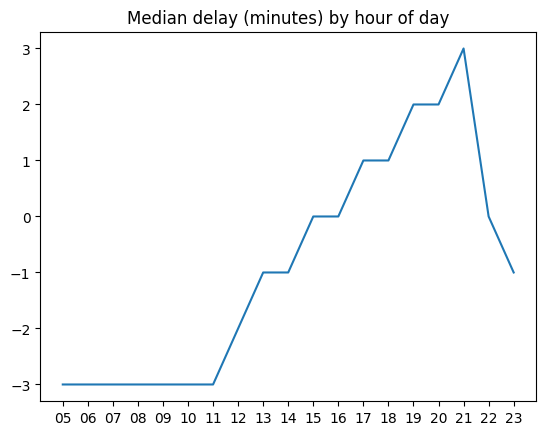

In [30]:
plt.plot(delay_by_hour.hour_of_day, delay_by_hour.median_delay)
plt.title('Median delay (minutes) by hour of day')
plt.show()

As we can see, during the day departure delay grows until 9PM. 

Next, let's figure out if median delay depends on weekday.

In [31]:
delay_by_weekday = pd.read_sql ("""

WITH ranked_flights AS (
SELECT strftime('%w',date) AS weekday, 
dep_delay,
NTILE(4) OVER(PARTITION BY strftime('%w',date) ORDER BY dep_delay) AS Quartile
FROM flights
WHERE dep_delay IS NOT NULL
)

SELECT weekday,
MAX(dep_delay) AS median_delay
FROM ranked_flights
WHERE Quartile = 2
GROUP BY weekday
ORDER BY weekday;
""", conn)
delay_by_weekday

,weekday,median_delay
0,0,-2.0
1,1,-1.0
2,2,-2.0
3,3,-2.0
4,4,-1.0
5,5,-1.0
6,6,-2.0


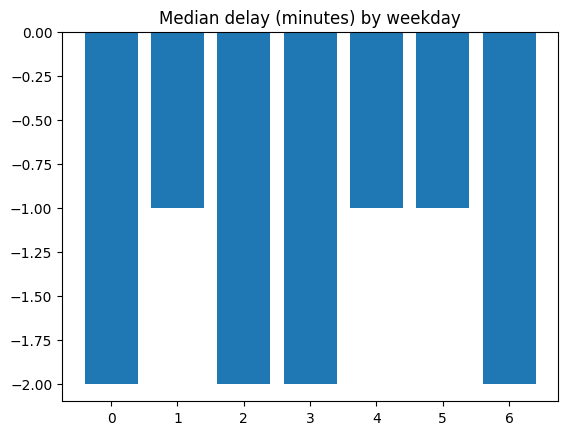

In [32]:
plt.bar(delay_by_weekday.weekday, delay_by_weekday.median_delay)
plt.title('Median delay (minutes) by weekday')
plt.show()

Next, let's see how the number of flights depends on month.

In [33]:
flights_by_month = pd.read_sql ("""
SELECT strftime('%m', date) AS month,
COUNT(*) AS total_flights
FROM flights
GROUP BY month
""", conn)
flights_by_month

,month,total_flights
0,01,27004
1,02,24951
2,03,28834
3,04,28330
4,05,28796
5,06,28243
6,07,29425
7,08,29327
8,09,27574
9,10,28889


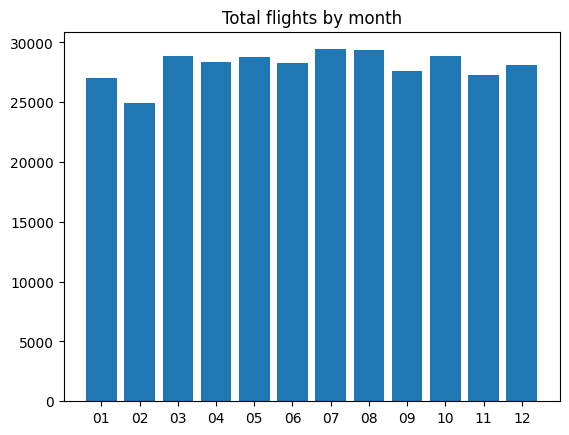

In [34]:
plt.bar(flights_by_month.month, flights_by_month.total_flights)
plt.title("Total flights by month")
plt.show()

As we can see, total flights by month is slightly evenly distributed. Deviations can be explained by different number of days in different months.

Next, let's find out how total number of flights depends on weekday.

In [35]:
flights_by_weekday = pd.read_sql ("""
SELECT strftime('%w',date) AS weekday, 
COUNT(*) AS flights_per_weekday
FROM flights
GROUP BY weekday
""", conn)
flights_by_weekday

,weekday,flights_per_weekday
0,0,46357
1,1,50690
2,2,50422
3,3,50060
4,4,50219
5,5,50308
6,6,38720


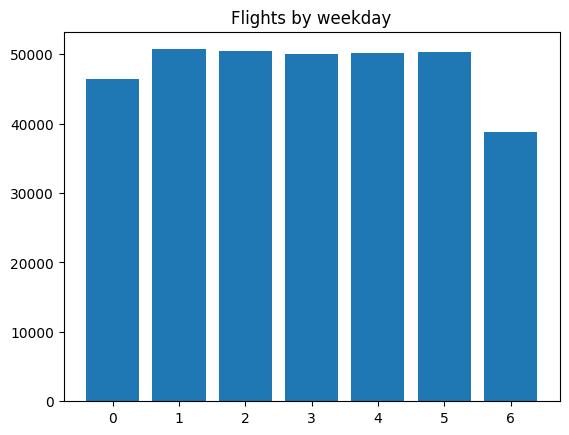

In [36]:
plt.bar(flights_by_weekday.weekday, flights_by_weekday.flights_per_weekday)
plt.title ('Flights by weekday')
plt.show()

We can see there are significantly fewer flights on Saturday, than on other days.

Now let's explore which origin airport has the highest departure delay.

In [37]:
median_airport_delay = pd.read_sql ("""

WITH ranked_flights AS (
SELECT origin, 
dep_delay,
NTILE(4) OVER(PARTITION BY origin ORDER BY dep_delay) AS Quartile
FROM flights
WHERE dep_delay IS NOT NULL
)

SELECT origin,
MAX(dep_delay) AS median_delay
FROM ranked_flights
WHERE Quartile = 2
GROUP BY origin
ORDER BY origin;
""", conn)
median_airport_delay

,origin,median_delay
0,EWR,-1.0
1,JFK,-1.0
2,LGA,-3.0


To analyze flights distance, let's find out which distribution does it have.

In [38]:
distance = pd.read_sql("""SELECT distance FROM flights""", conn)

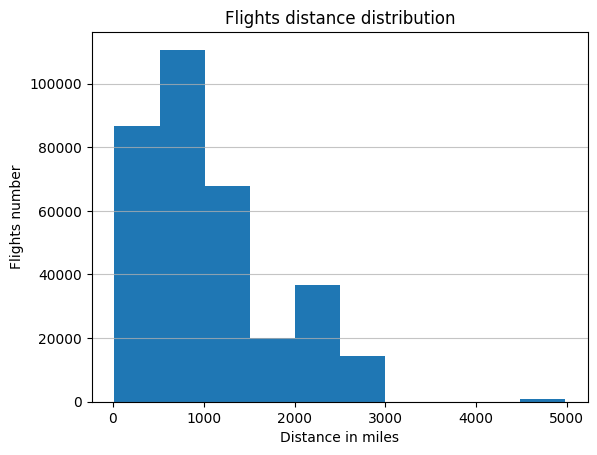

In [39]:
plt.hist(distance.distance)
plt.title('Flights distance distribution')
plt.xlabel('Distance in miles')
plt.ylabel('Flights number')
plt.grid(axis='y', alpha=0.75)
plt.show()

We can see that distance distribution is also right-skewed and mean value is not a great measure of central tendency. Instead, we should use median.

Now, let's analyze aircraft number to find how many total flights they have and which are median distance.

In [40]:
tailnum_stats = pd.read_sql("""
WITH ranked_flights AS (
SELECT tailnum, 
distance,
NTILE(4) OVER(PARTITION BY tailnum ORDER BY distance) AS Quartile,
COUNT(*) OVER (PARTITION BY tailnum) AS total_flights
FROM flights
WHERE tailnum IS NOT NULL
)

SELECT tailnum, 
total_flights,
MAX(distance) AS median_distance 
FROM ranked_flights
WHERE Quartile = 2
GROUP BY tailnum
ORDER BY total_flights DESC
""", conn)
tailnum_stats

,tailnum,total_flights,median_distance
0,N725MQ,575,479
1,N722MQ,513,479
2,N723MQ,507,479
3,N711MQ,486,479
4,N713MQ,483,479
...,...,...,...
3867,N162PQ,2,760
3868,N1611B,2,760
3869,N1610D,2,760
3870,N152DL,2,760
